# MODELO CLASIFICADOR XGBOOST - MEJORA HIPERPARÁMETROS

Ayuda para la realización de este notebook: https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/

Como mejora extra, intento conseguir un mejor accuracy de mi modelo con el ajuste de otros hiperparámetros propios del árbol.

No elimino ninguna feature y utilizo el set de datos de *Modelo_Clasificador_3.ipynb* como un complemento a este notebook previo al *Feature_Selection*.

**Librerías necesarias**

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import pickle

import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
import altair as alt

%matplotlib inline
plt.style.use('ggplot')

#Librerías para modelos

from xgboost import XGBClassifier
from xgboost import plot_importance

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFE

from sklearn.metrics import classification_report, confusion_matrix, precision_score

In [2]:
pd.options.display.max_columns= None

Descargo los resultados de *Modelo_Clasificador_3.ipynb*

In [3]:
path='/Users/blancabengoa/Desktop/KSchool/TFM/Modelo3/'

In [4]:
X_train = pickle.load(open(path + "X_train.pkl","rb"))
X_test = pickle.load(open(path + "X_test.pkl","rb"))
y_train = pickle.load(open(path + "y_train.pkl","rb"))
y_test = pickle.load(open(path + "y_test.pkl","rb"))

In [5]:
model=pickle.load(open(path + "clfxb_3.pkl","rb"))

### 1) Recupero resultados del modelo:

#### Parámetros

In [6]:
print(model.get_params())

{'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.1, 'max_delta_step': 0, 'max_depth': 3, 'min_child_weight': 1, 'missing': nan, 'n_estimators': 500, 'n_jobs': 1, 'nthread': None, 'objective': 'binary:logistic', 'random_state': 42, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'seed': None, 'silent': True, 'subsample': 1}


#### Accuracy, classification report

In [7]:
print('Accuracy: %.2f' %(accuracy_score(y_test, model.predict(X_test))))
print(classification_report(y_test,model.predict(X_test)))

Accuracy: 0.70
             precision    recall  f1-score   support

          0       0.70      0.55      0.62      1518
          1       0.71      0.82      0.76      1986

avg / total       0.70      0.70      0.70      3504



/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


### 2) Ajusto otros hiperparámetros

Dentro de los parámetros individuales del árbol, para un n_estimators=500, lanzo GridSearchCV según:

* **max_depth**: profundidad del árbol. Selecciono entre [3,4,5]. Buscar equilibrio entre que sea bajo (para evitar overfitting) sin caer en el underfitting.

* **gamma**: [0,0.2,0.5]

In [8]:
clfxb = GridSearchCV(XGBClassifier(n_estimators=500,max_depth=3,min_child_weight=1,gamma=0,random_state=42),
                    param_grid={'max_depth': [3,4,5],
                                'gamma': [0,0.2,0.5]},
                    scoring="accuracy",
                    cv=5)
clfxb.fit(X_train,y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=500,
       n_jobs=1, nthread=None, objective='binary:logistic',
       random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [3, 4, 5], 'gamma': [0, 0.2, 0.5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [10]:
clfxb.best_params_

{'gamma': 0.5, 'max_depth': 5}

Con gamma=0.5 soy más conservadora al utilizar una profundidad mayor que la por defecto (max_depth=3)

In [11]:
clfxb.best_score_

0.7485371771086057

Aparentemente mejora mi accuracy con respecto al modelo anterior. El score que se obtuvo en el notebook *Modelo_Clasificador_3.ipynb* con el set de entramiento estaba por debajo de 0.7.

Consulto como ha ido evolucionando con cada iteración:

In [12]:
clfxb.grid_scores_

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.69987, std: 0.00467, params: {'gamma': 0, 'max_depth': 3},
 mean: 0.72520, std: 0.00742, params: {'gamma': 0, 'max_depth': 4},
 mean: 0.74297, std: 0.00549, params: {'gamma': 0, 'max_depth': 5},
 mean: 0.69951, std: 0.00340, params: {'gamma': 0.2, 'max_depth': 3},
 mean: 0.72706, std: 0.00515, params: {'gamma': 0.2, 'max_depth': 4},
 mean: 0.74404, std: 0.00931, params: {'gamma': 0.2, 'max_depth': 5},
 mean: 0.69894, std: 0.00660, params: {'gamma': 0.5, 'max_depth': 3},
 mean: 0.72449, std: 0.00854, params: {'gamma': 0.5, 'max_depth': 4},
 mean: 0.74854, std: 0.00845, params: {'gamma': 0.5, 'max_depth': 5}]

Guardo los parámetros en model_ajustado:

In [13]:
model_ajustado=clfxb.best_estimator_

In [14]:
model_ajustado.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=500,
       n_jobs=1, nthread=None, objective='binary:logistic',
       random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)

In [15]:
print('Accuracy: %.2f' %accuracy_score(y_test, model_ajustado.predict(X_test)))

Accuracy: 0.75


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


### 3) Importancia de las variables en el nuevo modelo

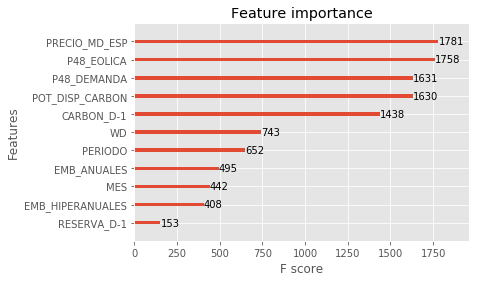

In [16]:
plot_importance(model_ajustado)
plt.rcParams['figure.figsize'] = [15, 15]
plt.show()

**NOTA:** Estoy utilizando como medida de la importancia la opción *weight*: cantidad de veces que se usa una función para dividir los datos en todos los árboles.

#### Feature selection

Utilizo SelectFromModel de la librería sklearn:

In [17]:
thresholds = sorted(model_ajustado.feature_importances_)
thresholds

[0.0137453955,
 0.03665439,
 0.03970892,
 0.0444704,
 0.05857515,
 0.06675052,
 0.12918875,
 0.14643788,
 0.14652772,
 0.15793729,
 0.16000359]

Recuerdo hiperparámetros seleccionados:

In [18]:
model_ajustado.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bytree': 1,
 'gamma': 0.5,
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 5,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 500,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'binary:logistic',
 'random_state': 42,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': True,
 'subsample': 1}

In [19]:
for t in thresholds:
    selection = SelectFromModel(model_ajustado, threshold=t, prefit=True)
    select_X_train = selection.transform(X_train)
    
    # Entreno con el nuevo set de training:
    selection_model = XGBClassifier(n_estimators=500,max_depth=5,gamma=0.5,random_state=42)
    selection_model.fit(select_X_train, y_train)
    # Resultados:
    select_X_test = selection.transform(X_test)
    y_pred = selection_model.predict(select_X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (t, select_X_train.shape[1], accuracy*100.0))
    print(classification_report(y_test, y_pred))

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.014, n=11, Accuracy: 75.43%
             precision    recall  f1-score   support

          0       0.75      0.65      0.70      1518
          1       0.76      0.83      0.79      1986

avg / total       0.75      0.75      0.75      3504



/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.037, n=10, Accuracy: 75.86%
             precision    recall  f1-score   support

          0       0.76      0.65      0.70      1518
          1       0.76      0.84      0.80      1986

avg / total       0.76      0.76      0.76      3504



/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.040, n=9, Accuracy: 74.89%
             precision    recall  f1-score   support

          0       0.75      0.63      0.69      1518
          1       0.75      0.84      0.79      1986

avg / total       0.75      0.75      0.75      3504



/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.044, n=8, Accuracy: 74.60%
             precision    recall  f1-score   support

          0       0.75      0.62      0.68      1518
          1       0.74      0.84      0.79      1986

avg / total       0.75      0.75      0.74      3504



/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.059, n=7, Accuracy: 73.09%
             precision    recall  f1-score   support

          0       0.73      0.60      0.66      1518
          1       0.73      0.83      0.78      1986

avg / total       0.73      0.73      0.73      3504



/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.067, n=6, Accuracy: 72.63%
             precision    recall  f1-score   support

          0       0.73      0.59      0.65      1518
          1       0.72      0.83      0.78      1986

avg / total       0.73      0.73      0.72      3504



/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.129, n=5, Accuracy: 70.92%
             precision    recall  f1-score   support

          0       0.71      0.55      0.62      1518
          1       0.71      0.83      0.76      1986

avg / total       0.71      0.71      0.70      3504



/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.146, n=4, Accuracy: 70.03%
             precision    recall  f1-score   support

          0       0.71      0.52      0.60      1518
          1       0.70      0.84      0.76      1986

avg / total       0.70      0.70      0.69      3504



/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.147, n=3, Accuracy: 59.93%
             precision    recall  f1-score   support

          0       0.56      0.36      0.44      1518
          1       0.62      0.78      0.69      1986

avg / total       0.59      0.60      0.58      3504



/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.158, n=2, Accuracy: 60.13%
             precision    recall  f1-score   support

          0       0.57      0.32      0.41      1518
          1       0.61      0.82      0.70      1986

avg / total       0.59      0.60      0.57      3504

Thresh=0.160, n=1, Accuracy: 59.59%
             precision    recall  f1-score   support

          0       0.57      0.28      0.38      1518
          1       0.60      0.84      0.70      1986

avg / total       0.59      0.60      0.56      3504



/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


En este caso, el accuracy sí empeora considerablemente si disminuyo el número de features, siendo el óptimo n=10 (eliminar RESERVA_D-1), a pesar de tener una importancia baja en el modelo las variables a partir de n=5. Con las métricas de Precision, Recall y F1-score ocurre lo mismo.

In [20]:
X_train_def=X_train.drop(['RESERVA_D-1'],axis=1).copy()
y_train_def=y_train.copy()
X_test_def=X_test.drop(['RESERVA_D-1'],axis=1).copy()
y_test_def=y_test.copy()

In [21]:
clfxb_4=XGBClassifier(n_estimators=500,max_depth=5,gamma=0.5,random_state=42)

In [22]:
clfxb_4.fit(X_train_def,y_train_def)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=500,
       n_jobs=1, nthread=None, objective='binary:logistic',
       random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)

In [23]:
print("Accuracy: %.2f%%" % (accuracy_score(y_test_def, clfxb_4.predict(X_test_def))))
print(classification_report(y_test_def, clfxb_4.predict(X_test_def)))

Accuracy: 0.76%
             precision    recall  f1-score   support

          0       0.76      0.65      0.70      1518
          1       0.76      0.84      0.80      1986

avg / total       0.76      0.76      0.76      3504



/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


**LINEA DE TRABAJO**: Continuar analizando este nuevo modelo y los resultados que arroja antes de sustituir por el anterior clfxb_4 (XGBoost - n_estimators=500)